# Logistic regression

## Ex 1) default dataset

In [746]:
#import library
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix,\
    classification_report,precision_score, accuracy_score, f1_score, recall_score
from sklearn import preprocessing
from sklearn import neighbors

import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings(action='ignore')

%matplotlib inline
plt.style.use('seaborn-white')

In [747]:
#Data loading
df = pd.read_excel('../data/Default.xlsx')
df['default2'] = df.default.factorize()[0]
df['student2'] = df.student.factorize()[0]
df.head(3)

Unnamed: 0 default student      balance        income  default2  student2
0           1      No      No   729.526495  44361.625074         0         0
1           2      No     Yes   817.180407  12106.134700         0         1
2           3      No      No  1073.549164  31767.138947         0         0

In [748]:
df.default.factorize()

(array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 Index(['No', 'Yes'], dtype='object'))

In [749]:
df.default.value_counts()

No     9667
Yes     333
Name: default, dtype: int64

#### EDA

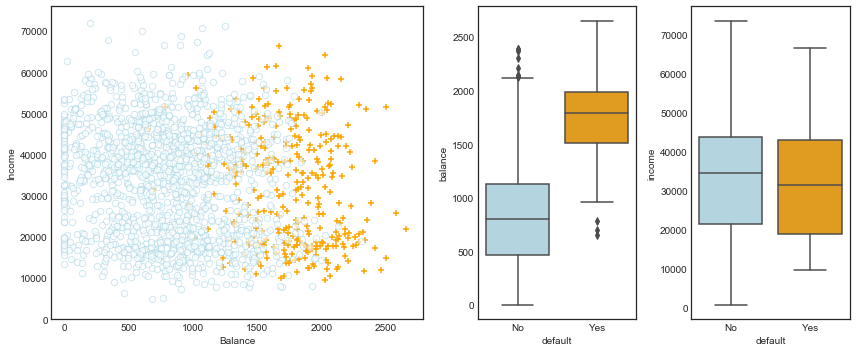

In [750]:
fig = plt.figure(figsize=(12,5))
gs = mpl.gridspec.GridSpec(1, 4)
ax1 = plt.subplot(gs[0,:-2])
ax2 = plt.subplot(gs[0,-2])
ax3 = plt.subplot(gs[0,-1])

# Take a fraction of the samples where target value (default) is 'no'
df_no = df[df.default2 == 0].sample(frac=0.15)
# Take all samples  where target value is 'yes'
df_yes = df[df.default2 == 1]
df_ = df_no.append(df_yes)

ax1.scatter(df_[df_.default == 'Yes'].balance, df_[df_.default == 'Yes'].income,\
            s=40, c='orange', marker='+',
            linewidths=1)
ax1.scatter(df_[df_.default == 'No'].balance, df_[df_.default == 'No'].income,\
            s=40, marker='o', linewidths='1',
            edgecolors='lightblue', facecolors='white', alpha=.6)

ax1.set_ylim(ymin=0)
ax1.set_ylabel('Income')
ax1.set_xlim(xmin=-100)
ax1.set_xlabel('Balance')

c_palette = {'No':'lightblue', 'Yes':'orange'}
sns.boxplot('default', 'balance', data=df, orient='v', ax=ax2, palette=c_palette)
sns.boxplot('default', 'income', data=df, orient='v', ax=ax3, palette=c_palette)
gs.tight_layout(plt.gcf())

In [793]:
#get train/test set
#Model fitting
X_train = df.balance.values.reshape(-1,1) 
y = df.default2
X_test = np.arange(df.balance.min(), df.balance.max()).reshape(-1,1)

clf = skl_lm.LogisticRegression(solver='newton-cg', penalty='l2')
clf.fit(X_train,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

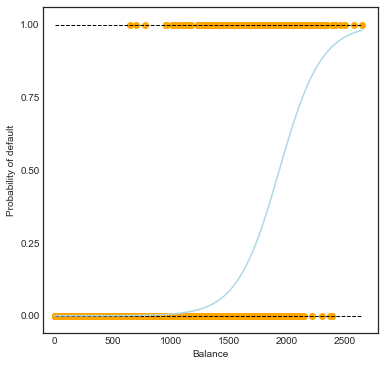

In [640]:
prob = clf.predict_proba(X_test)

fig, (ax2) = plt.subplots(1,1, figsize=(6,6))
# Right plot
ax2.scatter(X_train, y, color='orange')
ax2.plot(X_test, prob[:,1], color='lightblue')

for ax in fig.axes:
    ax.hlines(1, xmin=ax.xaxis.get_data_interval()[0],
              xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
    ax.hlines(0, xmin=ax.xaxis.get_data_interval()[0],
              xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
    ax.set_ylabel('Probability of default')
    ax.set_xlabel('Balance')
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1.])
    ax.set_xlim(xmin=-100)

In [796]:
clf = skl_lm.LogisticRegression(solver='newton-cg', penalty='l2')
clf.fit(X_train,y_train)
print('classes: ',clf.classes_)
print('coefficients: ',clf.coef_)
print('intercept :', clf.intercept_)

classes:  [0 1]
coefficients:  [[0.00551356]]
intercept : [-10.59483485]


#### Model evaluation

In [797]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
print("Train acc :", accuracy_score(y_train, y_train_pred))
print("Test acc :", accuracy_score(y_test, y_test_pred))

Train acc : 0.9706666666666667
Test acc : 0.97425


In [798]:
print("Confusion matrix :")
print(confusion_matrix(y_test, y_test_pred))

Confusion matrix :
[[3858   23]
 [  80   39]]


In [799]:
print("f1 score :")
print(f1_score(y_test, y_test_pred))

f1 score :
0.430939226519337


In [800]:
print("Recall score :")
print(recall_score(y_test, y_test_pred))

Recall score :
0.3277310924369748


In [801]:
print("Precision score :")
print(precision_score(y_test, y_test_pred))

Precision score :
0.6290322580645161


In [820]:
from sklearn.model_selection import train_test_split

y = df.default2
X = df.balance.values.reshape(-1,1)
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, test_size = 0.4, random_state = 15)

In [821]:
clf = skl_lm.LogisticRegression(solver='newton-cg', penalty='l2')
clf.fit(X_train,y_train)
print('classes: ',clf.classes_)
print('coefficients: ',clf.coef_)
print('intercept :', clf.intercept_)

classes:  [0 1]
coefficients:  [[0.00560867]]
intercept : [-10.83651699]


In [822]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
print("Train acc :", accuracy_score(y_train, y_train_pred))
print("Test acc :", accuracy_score(y_test, y_test_pred))

Train acc : 0.9728333333333333
Test acc : 0.9715


#### New test set reconstruction

In [838]:
def get_new_testSet(df, features):
    X_0 = df[df.default2 == 0][features].values
    X_1 = df[df.default2 == 1][features].values

    y_0 = df[df.default2 == 0]['default2'].values
    y_1 = df[df.default2 == 1]['default2'].values

    X_train_0, X_test_0, y_train_0, y_test_0 =\
        train_test_split(X_0, y_0, test_size = 0.1, random_state = 42)
    X_train_1, X_test_1, y_train_1, y_test_1 =\
        train_test_split(X_1, y_1, test_size = 0.3, random_state = 42)

    X_train_new = np.append(X_train_0, X_train_1, axis= 0)
    y_train_new = np.append(y_train_0, y_train_1, axis= 0)
    X_test_new = np.append(X_test_0, X_test_1, axis= 0)
    y_test_new = np.append(y_test_0, y_test_1, axis= 0)
    
    X_train_new = X_train_new.reshape(-1,len(features))
    X_test_new = X_test_new.reshape(-1,len(features))
    
    return X_train_new, y_train_new, X_test_new, y_test_new

In [839]:
X_train_new, y_train_new, X_test_new, y_test_new = get_new_testSet(df, ['balance'])

In [840]:
clf = skl_lm.LogisticRegression(solver='newton-cg', penalty='l2')
clf.fit(X_train_new,y_train_new)
print('classes: ',clf.classes_)
print('coefficients: ',clf.coef_)
print('intercept :', clf.intercept_)

classes:  [0 1]
coefficients:  [[0.00552152]]
intercept : [-10.9363248]


In [841]:
y_train_pred = clf.predict(X_train_new)
y_test_pred = clf.predict(X_test_new)
print("Train acc :", accuracy_score(y_train_new, y_train_pred))
print("Test acc :", accuracy_score(y_test_new, y_test_pred))

Train acc : 0.9781708272696742
Test acc : 0.9259606373008434


In [842]:
print("Confusion matrix :")
print(confusion_matrix(y_test_new, y_test_pred))

Confusion matrix :
[[964   3]
 [ 76  24]]


In [843]:
print("f1 score")
print(f1_score(y_test_new, y_test_pred))

f1 score
0.3779527559055118


In [844]:
print("Recall score :")
print(recall_score(y_test_new, y_test_pred))

Recall score :
0.24


####  Multivariate Logistic Regression

In [918]:
data = df[['balance', 'income', 'student2']].values
data

array([[7.29526495e+02, 4.43616251e+04, 0.00000000e+00],
       [8.17180407e+02, 1.21061347e+04, 1.00000000e+00],
       [1.07354916e+03, 3.17671389e+04, 0.00000000e+00],
       ...,
       [8.45411989e+02, 5.86361570e+04, 0.00000000e+00],
       [1.56900905e+03, 3.66691124e+04, 0.00000000e+00],
       [2.00922183e+02, 1.68629523e+04, 1.00000000e+00]])

In [920]:
scaler =preprocessing.MinMaxScaler()
scaler.fit(data)
preproc =  scaler.transform(data)

df_preproc = pd.DataFrame(preproc, columns = ['balance', 'income', 'student2'])
df_preproc['default2'] = y
df_preproc

balance    income  student2  default2
0     0.274845  0.598905       0.0         0
1     0.307868  0.155727       1.0         0
2     0.404453  0.425862       0.0         0
3     0.199392  0.479959       0.0         0
4     0.295991  0.517867       0.0         0
...        ...       ...       ...       ...
9995  0.268074  0.717488       0.0         0
9996  0.285558  0.259524       0.0         0
9997  0.318504  0.795031       0.0         0
9998  0.591115  0.493213       0.0         0
9999  0.075696  0.221084       1.0         0

[10000 rows x 4 columns]

In [912]:
X_train_new, y_train_new, X_test_new, y_test_new = get_new_testSet(df_preproc, ['balance', 'income', 'student2'])

In [913]:
clf = skl_lm.LogisticRegression(solver='newton-cg', penalty='none')
clf.fit(X_train_new,y_train_new)
print('classes: ',clf.classes_)
print('coefficients: ',clf.coef_)
print('intercept :', clf.intercept_)

classes:  [0 1]
coefficients:  [[15.13370241  0.76507187 -0.35656013]]
intercept : [-11.39798342]


In [914]:
y_train_pred = clf.predict(X_train_new)
y_test_pred = clf.predict(X_test_new)
print("Train acc :", accuracy_score(y_train_new, y_train_pred))
print("Test acc :", accuracy_score(y_test_new, y_test_pred))

Train acc : 0.9783947162207545
Test acc : 0.9287722586691659


In [915]:
print("Confusion matrix :")
print(confusion_matrix(y_test_new, y_test_pred))

Confusion matrix :
[[964   3]
 [ 73  27]]


## Ex 2) LoL data

In [933]:
import numpy as np
import pandas as pd
df_lol = pd.read_csv('../data/games.csv')
df_lol.head()

gameId   creationTime  gameDuration  seasonId  winner  firstBlood  \
0  3326086514  1504279457970          1949         9       1           2   
1  3229566029  1497848803862          1851         9       1           1   
2  3327363504  1504360103310          1493         9       1           2   
3  3326856598  1504348503996          1758         9       1           1   
4  3330080762  1504554410899          2094         9       1           2   

   firstTower  firstInhibitor  firstBaron  firstDragon  ...  t2_towerKills  \
0           1               1           1            1  ...              5   
1           1               1           0            1  ...              2   
2           1               1           1            2  ...              2   
3           1               1           1            1  ...              0   
4           1               1           1            1  ...              3   

   t2_inhibitorKills  t2_baronKills  t2_dragonKills  t2_riftHeraldKills  \
0                  0              0               1                   1   
1                  0              0               0                   0   
2                  0              0               1                   0   
3                  0              0               0                   0   
4                  0              0               1                   0   

   t2_ban1  t2_ban2  t2_ban3  t2_ban4  t2_ban5  
0      114       67       43       16       51  
1       11       67      238       51      420  
2      157      238      121       57       28  
3      164       18      141       40       51  
4       86       11      201      122       18  

[5 rows x 61 columns]

In [932]:
df_lol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51490 entries, 0 to 51489
Data columns (total 61 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   gameId              51490 non-null  int64
 1   creationTime        51490 non-null  int64
 2   gameDuration        51490 non-null  int64
 3   seasonId            51490 non-null  int64
 4   winner              51490 non-null  int64
 5   firstBlood          51490 non-null  int64
 6   firstTower          51490 non-null  int64
 7   firstInhibitor      51490 non-null  int64
 8   firstBaron          51490 non-null  int64
 9   firstDragon         51490 non-null  int64
 10  firstRiftHerald     51490 non-null  int64
 11  t1_champ1id         51490 non-null  int64
 12  t1_champ1_sum1      51490 non-null  int64
 13  t1_champ1_sum2      51490 non-null  int64
 14  t1_champ2id         51490 non-null  int64
 15  t1_champ2_sum1      51490 non-null  int64
 16  t1_champ2_sum2      51490 non-null  int6

In [931]:
df_lol.firstBlood.value_counts()

1    26113
2    24822
0      555
Name: firstBlood, dtype: int64

In [756]:
df_lol.winner.value_counts()

1    26077
2    25413
Name: winner, dtype: int64

In [757]:
df_lol.groupby(by = 'firstTower').mean()['gameDuration']

firstTower
0     211.513603
1    1864.414988
2    1878.938360
Name: gameDuration, dtype: float64

In [936]:
df_lol.groupby(by = ['winner','firstTower']).count()['gameId']

winner  firstTower
1       0               628
        1             18320
        2              7129
2       0               585
        1              7541
        2             17287
Name: gameId, dtype: int64

In [938]:
#One-hot encoding
X = df_lol[['firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon']]
X = X.astype('object')
X_encoded = pd.get_dummies(X, drop_first=True)
X_encoded

firstBlood_1  firstBlood_2  firstTower_1  firstTower_2  \
0                 0             1             1             0   
1                 1             0             1             0   
2                 0             1             1             0   
3                 1             0             1             0   
4                 0             1             1             0   
...             ...           ...           ...           ...   
51485             1             0             0             1   
51486             1             0             1             0   
51487             0             1             0             1   
51488             0             1             0             1   
51489             1             0             1             0   

       firstInhibitor_1  firstInhibitor_2  firstBaron_1  firstBaron_2  \
0                     1                 0             1             0   
1                     1                 0             0             0   
2                     1                 0             1             0   
3                     1                 0             1             0   
4                     1                 0             1             0   
...                 ...               ...           ...           ...   
51485                 0                 1             0             0   
51486                 0                 1             0             1   
51487                 0                 1             0             0   
51488                 0                 1             0             0   
51489                 1                 0             1             0   

       firstDragon_1  firstDragon_2  
0                  1              0  
1                  1              0  
2                  0              1  
3                  1              0  
4                  1              0  
...              ...            ...  
51485              0              1  
51486              0              1  
51487              1              0  
51488              0              1  
51489              0              1  

[51490 rows x 10 columns]

In [766]:
X_encoded = X_encoded.astype('int64')
X_encoded.dtypes

firstBlood_1        int64
firstBlood_2        int64
firstTower_1        int64
firstTower_2        int64
firstInhibitor_1    int64
firstInhibitor_2    int64
firstBaron_1        int64
firstBaron_2        int64
firstDragon_1       int64
firstDragon_2       int64
dtype: object

In [770]:
y = df_lol.winner
X_encoded = X_encoded.values.reshape(-1,len(X_encoded.columns))
X_train, X_test, y_train, y_test =\
    train_test_split(X_encoded, y, test_size = 0.3, random_state = 11)

In [781]:
clf = skl_lm.LogisticRegression(solver='newton-cg', penalty='l2')
clf.fit(X_train,y_train)
print('classes: ',clf.classes_)
print('coefficients: ',clf.coef_)
print('intercept :', clf.intercept_)

classes:  [1 2]
coefficients:  [[ 0.06048222  0.4113552  -0.67112357  0.20002057 -2.0468698   1.92721792
  -0.91447921  1.12002775 -0.2480849   0.60115024]]
intercept : [-0.1962907]


In [782]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
print("Train acc :", accuracy_score(y_train, y_train_pred))
print("Test acc :", accuracy_score(y_test, y_test_pred))

Train acc : 0.8954304580639791
Test acc : 0.8933126173366996


In [783]:
print("Confusion matrix :")
print(confusion_matrix(y_test, y_test_pred))

Confusion matrix :
[[7097  755]
 [ 893 6702]]


In [784]:
print("f1 score")
print(f1_score(y_test, y_test_pred))

f1 score
0.8959727307158187
